# DS 3000 - Practicum 2

**Student Names**: Tarun Nagesh, Maryam Abdus Salaam, David Yu

**Date**: March 1st, 2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1 — The DS Problem

In your own words, formulate the Data Science problem that you were given.


The Data Science (DS) problem for this practicum is to analyze wildlife airstrike data to extract insights into the loss of lives and machinery, common factors, and potential prevantative steps that airlines can take to minimizes these losses.

## **Objectives**
1.

2.

3.

## Question 2 — Clean the data (10 pts)
Load the data using pandas and inspect it.

1) Perform the initial inspection of the data, its shape, types, etc.

2) Evaluate the dataset and perform at least three type of data preparation and justify the approach that is taken to prepare the data for analysis. Data prep can include, but is not limited to: handling missing values, data types, duplicates, etc. You will need to ensure that your data preparation addressed issues in at least 7 fields in the data.

3) Prepare meaningful* summary statistics for 3 continuous variables and 3 categorical variables.
Note: meaningful summary statistics explains the statistical summary of relevant fields in a coherent manner.


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bird_strike_df = pd.read_csv("Bird_Strikes_1990_2023.csv")
# Displaying first 5 rows
bird_strike_df.head()

/var/folders/7d/kwt0yt6x3c37s1k0wbtcbt0w0000gn/T/ipykernel_5250/686169191.py:4: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  bird_strike_df = pd.read_csv("Bird_Strikes_1990_2023.csv")


,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
2,608244,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,...,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
3,608245,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,...,Medium,NaN,NaN,/Legacy Record=100004/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
4,608246,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,...,Medium,NaN,NaN,/Legacy Record=100005/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False


In [71]:
# Displaying shape and data types
print(bird_strike_df.shape)
info = bird_strike_df.info()
print(info)

(288810, 100)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STATE        

In [72]:
# Displaying the number of missing values for each column
print(bird_strike_df.isnull().sum())
print()

# Looking at the rows with the maximum amount of columns missing
print(bird_strike_df.isnull().sum(axis=1).sort_values(ascending = False))

INDEX_NR               0
INCIDENT_DATE          0
INCIDENT_MONTH         0
INCIDENT_YEAR          0
TIME              125177
                   ...  
REPORTED_TITLE         0
SOURCE                 0
PERSON             21134
LUPDATE                0
TRANSFER               0
Length: 100, dtype: int64

42693     43
52161     43
144649    43
37786     42
248211    42
          ..
56926      8
59956      8
86807      8
266947     8
237705     8
Length: 288810, dtype: int64


In [73]:
# Dropping any columns with more than 1/3 of the entries null for it
limit = 288810/3
columns_to_drop = []
for column in bird_strike_df.columns:
    if bird_strike_df[column].isna().sum() > limit and column not in ["HEIGHT", "SPEED", "PHASE_OF_FLIGHT", "DAMAGE_LEVEL"]:
        columns_to_drop.append(column)

bird_strike_df = bird_strike_df.drop(columns=columns_to_drop)

# Verifying changes happened
print(columns_to_drop)
print()
print(bird_strike_df.isnull().sum())
print()
print(bird_strike_df.shape)


['TIME', 'TIME_OF_DAY', 'LOCATION', 'ENROUTE_STATE', 'REG', 'FLT', 'AMO', 'EMA', 'EMO', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'DISTANCE', 'SKY', 'PRECIPITATION', 'AOS', 'COST_REPAIRS', 'COST_OTHER', 'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'OTHER_SPECIFY', 'EFFECT', 'EFFECT_OTHER', 'BIRD_BAND_NUMBER', 'NUM_SEEN', 'NR_INJURIES', 'NR_FATALITIES']

INDEX_NR              0
INCIDENT_DATE         0
INCIDENT_MONTH        0
INCIDENT_YEAR         0
AIRPORT_ID            6
                  ...  
REPORTED_TITLE        0
SOURCE                0
PERSON            21134
LUPDATE               0
TRANSFER              0
Length: 73, dtype: int64

(288810, 73)


In [74]:
# Checking rows' null values
print(bird_strike_df.isnull().sum(axis=1).sort_values(ascending = False))

248211    17
248208    17
226036    17
236577    17
248194    17
          ..
77130      0
77128      0
77116      0
77112      0
144405     0
Length: 288810, dtype: int64


In [75]:
# Dropping any rows with more than 6 of the columns null for it
rows_to_drop = bird_strike_df[bird_strike_df.isna().sum(axis=1) > 6].index
bird_strike_df = bird_strike_df.drop(index=rows_to_drop)
bird_strike_df = bird_strike_df.reset_index(drop=True)

In [76]:
# Checking if the changes worked
print(len(rows_to_drop))
print(bird_strike_df.isnull().sum(axis=1).sort_values(ascending = False))

113223
64956     6
143216    6
126517    6
24217     6
126536    6
         ..
122072    0
89236     0
89235     0
40248     0
83900     0
Length: 175587, dtype: int64


In [77]:
# Checking data types to see if any need to be changed
info = bird_strike_df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175587 entries, 0 to 175586
Data columns (total 73 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INDEX_NR           175587 non-null  int64  
 1   INCIDENT_DATE      175587 non-null  object 
 2   INCIDENT_MONTH     175587 non-null  int64  
 3   INCIDENT_YEAR      175587 non-null  int64  
 4   AIRPORT_ID         175587 non-null  object 
 5   AIRPORT            175587 non-null  object 
 6   LATITUDE           171699 non-null  float64
 7   LONGITUDE          171698 non-null  float64
 8   RUNWAY             142799 non-null  object 
 9   STATE              171699 non-null  object 
 10  FAAREGION          171699 non-null  object 
 11  OPID               175586 non-null  object 
 12  OPERATOR           175587 non-null  object 
 13  AIRCRAFT           175587 non-null  object 
 14  AMA                174056 non-null  object 
 15  AC_CLASS           175371 non-null  object 
 16  AC

In [78]:
# Converting date columns to datetime
bird_strike_df["INCIDENT_DATE"] = pd.to_datetime(bird_strike_df["INCIDENT_DATE"])
bird_strike_df["LUPDATE"] = pd.to_datetime(bird_strike_df["LUPDATE"])

# Converting some columns to integers
for col in ["NUM_ENGS", "ENG_1_POS"]:
    bird_strike_df[col] = pd.to_numeric(bird_strike_df[col]).astype("Int64")

## Question 3 — Perform Exploratory Data Analysis (40 pts)
Perform an in-depth analysis by creating visualizations to understand the distribution and relationships within the data, while ensuring that your analysis and explanation of the results tell a story. It's important to select appropriate visualizations based on the type of data. Explain all results.

1) Analyze the proportion of incidents that occur each year.

2) Evaluate the distribution of bird strikes in each state and display the top 20 states.

3) What is the most common bird species that are involved in bird strikes.

4) Perform a comparative analysis of the annual aircraft damage for each phase of flight. Evaluate the results over the last 10 years to determine what patterns exist. Note: this requires a year over year analysis.

5) Analyze the frequency of bird strike incidents that occur on a monthly basis over the last 10 years. Analyze the results to determine when these incidents are more prevalent.  This question requires you to drill deeper into the analysis to determine if the distribution has changed over the last 10 years. Note: this requires a year over year analysis.

6) Perform ONE (1) additional analysis on the distribution. Ensure that you either : 1) perform a comparative analysis by evaluating 3 or more groups within the data or 2) perform a temporal analysis of the patterns over 10 or more years (this requires a year over year analysis of the patterns). Do not repeat any of the previous analysis.


### 1. Analyze the proportion of incidents that occur each year.

In [79]:
yearly_incidents = bird_strike_df['INCIDENT_YEAR'].value_counts().sort_index()
total_incidents = len(bird_strike_df)

yearly_proportion = yearly_incidents / total_incidents

yearly_analysis = pd.DataFrame({
    'Year': yearly_proportion.index,
    'Count': yearly_incidents.values,
    'Proportion': yearly_proportion.values
})

print("Yearly Incident Proportion:")
print(yearly_analysis)

Yearly Incident Proportion:
    Year  Count  Proportion
0   1990   1702    0.009693
1   1991   2177    0.012398
2   1992   2219    0.012638
3   1993   2206    0.012564
4   1994   2308    0.013144
5   1995   2389    0.013606
6   1996   2476    0.014101
7   1997   2825    0.016089
8   1998   2939    0.016738
9   1999   3640    0.020730
10  2000   4113    0.023424
11  2001   3996    0.022758
12  2002   4268    0.024307
13  2003   4139    0.023572
14  2004   4603    0.026215
15  2005   4654    0.026505
16  2006   4760    0.027109
17  2007   5016    0.028567
18  2008   4786    0.027257
19  2009   6307    0.035920
20  2010   6065    0.034541
21  2011   6167    0.035122
22  2012   6474    0.036871
23  2013   6301    0.035885
24  2014   7971    0.045396
25  2015   7881    0.044884
26  2016   7728    0.044012
27  2017   7950    0.045277
28  2018   8899    0.050681
29  2019   9243    0.052641
30  2020   5822    0.033157
31  2021   8239    0.046923
32  2022   9126    0.051974
33  2023   6198    0

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

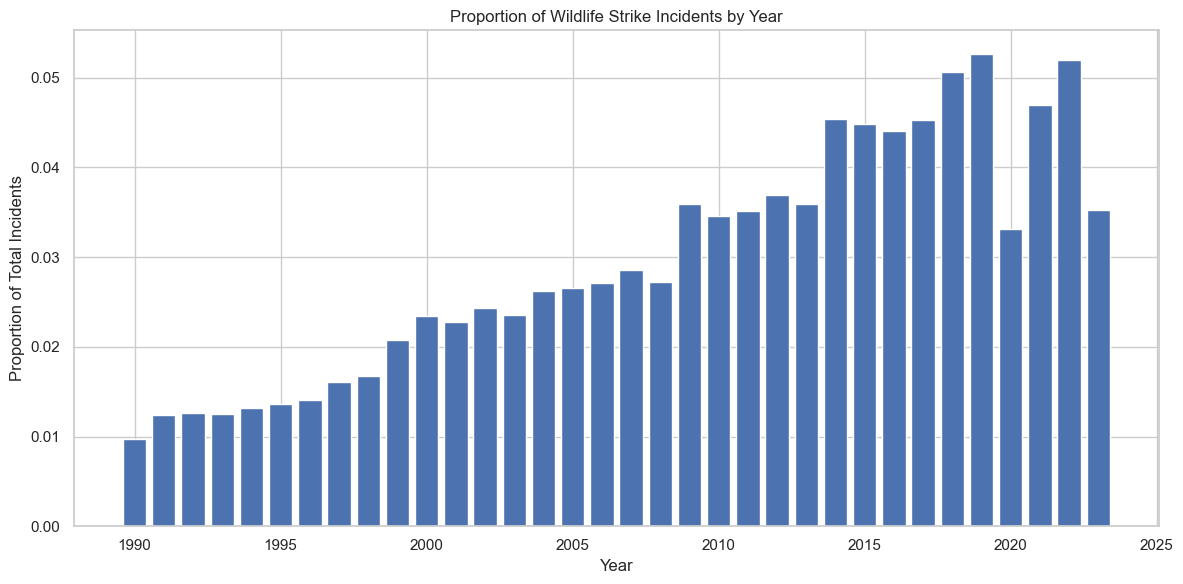

In [80]:
plt.figure(figsize=(12, 6))
plt.bar(yearly_analysis['Year'], yearly_analysis['Proportion'])
plt.title('Proportion of Wildlife Strike Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Total Incidents')
plt.tight_layout()
plt.show()

The data shows a clear upward trend in the proportion of wildlife strike incidents from 1990 to 2023. 
- There's a steady increase in wildlife strike incidents from 1990 to 2023.
- 2018 was a peak year with the highest proportion of incidents.
- There is a sharp drop in 2020, possibly due to COVID and reduced air travel.

### 2. Evaluate the distribution of bird strikes in each state and display the top 20 states.

In [81]:
state_distribution = bird_strike_df['STATE'].value_counts().reset_index()
state_distribution.columns = ['State', 'Number of Strikes']

top_20_states = state_distribution.head(20)
print("Top 20 States with the Most Bird Strikes:")
print(top_20_states)

Top 20 States with the Most Bird Strikes:
   State  Number of Strikes
0     TX              16066
1     CA              15903
2     FL              14773
3     NY               9001
4     IL               7193
5     TN               6950
6     PA               6211
7     CO               6137
8     NC               5099
9     OH               4847
10    KY               4728
11    MO               4551
12    FN               4500
13    MI               4073
14    GA               3871
15    NJ               3751
16    DC               3540
17    HI               2974
18    IN               2756
19    WA               2717


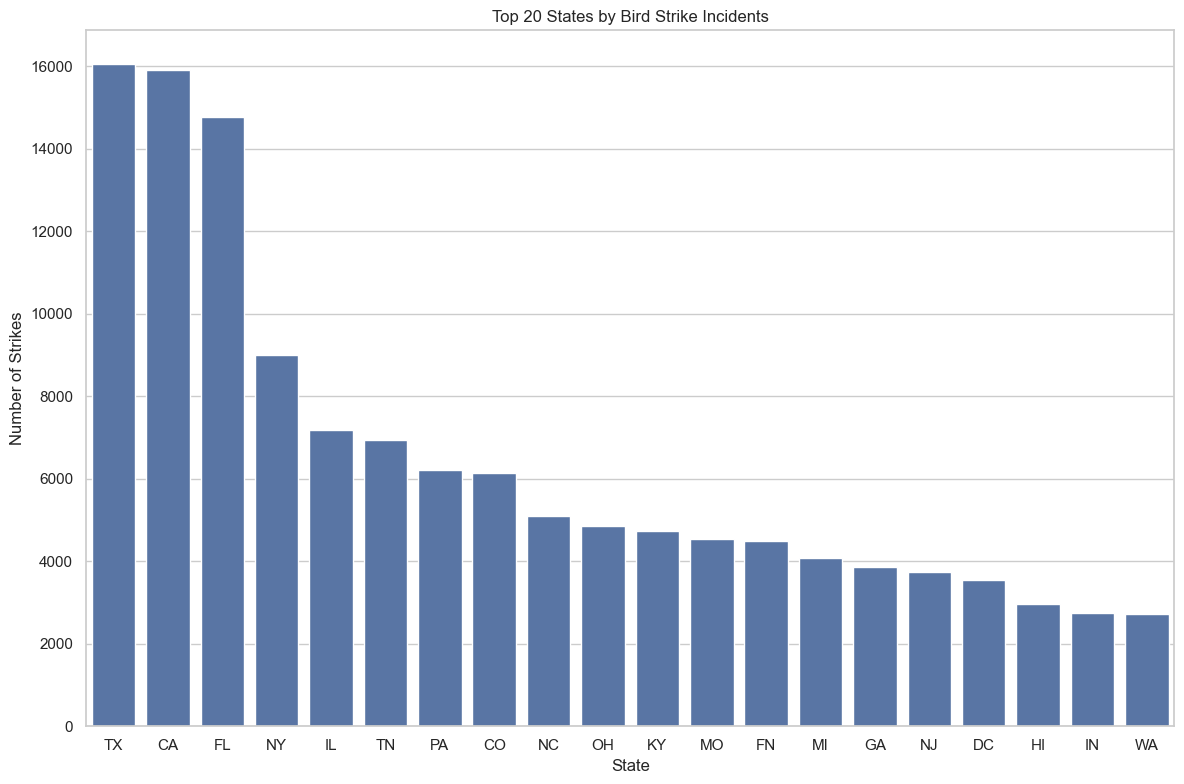

In [82]:
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Number of Strikes', data=top_20_states)
plt.title('Top 20 States by Bird Strike Incidents')
plt.xlabel('State')
plt.ylabel('Number of Strikes')
plt.tight_layout()
plt.show()

The results here indicate a geographic pattern in bird strike incidents. As we can see from the graph, Texas leads significantly, followed by California, then Florida. These three states make up a lot of land and also have multiple major airports. Other major travel hubs like New York and Illinois also have a lot of bird strike incidents. This graph shows that the number of bird strikes isn't evenly distributed across states, but is concentrated in regions with a lot of land and heavy air traffic.

### 3. What is the most common bird species that are involved in bird strikes.

In [83]:
species_counts = bird_strike_df['SPECIES'].value_counts().reset_index()
species_counts.columns = ['Bird Species', 'Number of Strikes']

top_species = species_counts.head(10)
print("Top 10 Bird Species Involved in Strikes:")
print(top_species)

Top 10 Bird Species Involved in Strikes:
            Bird Species  Number of Strikes
0   Unknown bird - small              43581
1  Unknown bird - medium              29020
2           Unknown bird              19892
3                  Gulls               6490
4          Mourning dove               4690
5           Barn swallow               4673
6   Unknown bird - large               3526
7      European starling               3416
8               Sparrows               2997
9               Killdeer               2683


The most common bird species that are involved in bird strikes are unknown birds. This could potentially be because the birds in a bird strike are too damaged to identify. Among the birds that were identified, the most common bird to be involved in bird strikes is the Mourning dove.

### 4. Perform a comparative analysis of the annual aircraft damage for each phase of flight. Evaluate the results over the last 10 years to determine what patterns exist. Note: this requires a year over year analysis.

In [84]:
recent_years = range(2014, 2024)
recent_data = bird_strike_df[bird_strike_df['INCIDENT_YEAR'].isin(recent_years)]

yearly_damage = recent_data.groupby(['INCIDENT_YEAR', 'INDICATED_DAMAGE']).size().unstack(fill_value=0)

print("\nYearly Damage Analysis (2014-2023):")
print(yearly_damage)

yearly_damage_pct = yearly_damage.div(yearly_damage.sum(axis=1), axis=0) * 100

print("\nPercentage of Each Damage Type by Year:")
print(yearly_damage_pct)

yoy_percent_change = yearly_damage.pct_change() * 100
print("\nYear-over-Year Percentage Change:")
print(yoy_percent_change)


Yearly Damage Analysis (2014-2023):
INDICATED_DAMAGE  False  True 
INCIDENT_YEAR                 
2014               7458    513
2015               7373    508
2016               7230    498
2017               7385    565
2018               8281    618
2019               8610    633
2020               5402    420
2021               7673    566
2022               8556    570
2023               5869    329

Percentage of Each Damage Type by Year:
INDICATED_DAMAGE      False     True 
INCIDENT_YEAR                        
2014              93.564170  6.435830
2015              93.554117  6.445883
2016              93.555901  6.444099
2017              92.893082  7.106918
2018              93.055399  6.944601
2019              93.151574  6.848426
2020              92.785984  7.214016
2021              93.130234  6.869766
2022              93.754109  6.245891
2023              94.691836  5.308164

Year-over-Year Percentage Change:
INDICATED_DAMAGE      False      True 
INCIDENT_YEAR       

<Figure size 1400x800 with 0 Axes>

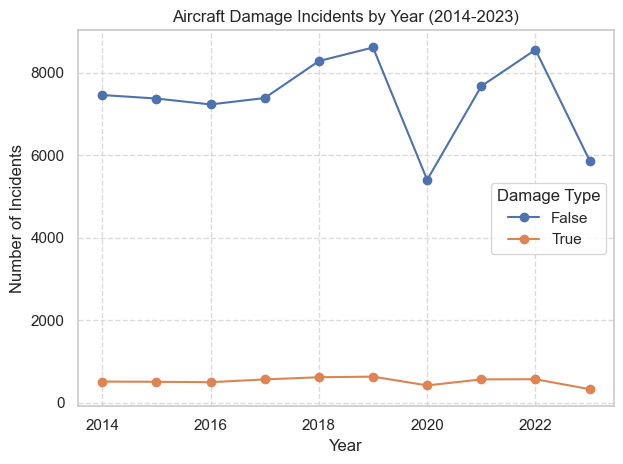

In [85]:
plt.figure(figsize=(14, 8))
yearly_damage.plot(marker='o')
plt.title('Aircraft Damage Incidents by Year (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Damage Type')
plt.tight_layout()
plt.show()

A vast majority of bird strikes did not result in aircraft damage. The number of aircraft damage incidents changes with air traffic volume, as we can see both damaging and non-damanging incidents drop during 2020, which was COVID and less air travel. However, the proportion of strikes causing damage remains relatively stable.

### 5. Analyze the frequency of bird strike incidents that occur on a monthly basis over the last 10 years. Analyze the results to determine when these incidents are more prevalent.  This question requires you to drill deeper into the analysis to determine if the distribution has changed over the last 10 years. Note: this requires a year over year analysis.

In [86]:
recent_years = range(2014, 2024)
recent_data = bird_strike_df[bird_strike_df['INCIDENT_YEAR'].isin(recent_years)]

monthly_incidents = pd.pivot_table(
    recent_data,
    values='INDEX_NR',
    index='INCIDENT_MONTH',
    columns='INCIDENT_YEAR',
    aggfunc='count',
    fill_value=0
)

print("Monthly Bird Strike Incidents (2014-2023):")
print(monthly_incidents)

yearly_totals = monthly_incidents.sum()
monthly_percentage = monthly_incidents.div(yearly_totals, axis=1) * 100

print("\nMonthly Percentage Distribution by Year:")
print(monthly_percentage)

Monthly Bird Strike Incidents (2014-2023):
INCIDENT_YEAR   2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
INCIDENT_MONTH                                                            
1                186   223   276   262   236   280   248   223   209   330
2                199   241   252   268   253   313   237   230   250   308
3                304   393   344   362   386   427   364   331   430   493
4                541   673   593   563   667   669   248   589   765   853
5                842   831   874   782   924   986   375   857   926  1155
6                622   644   642   657   673   747   395   678   687   814
7               1024   925   894  1030  1061  1104   787  1082  1068  1189
8               1141  1079  1078  1118  1248  1378   889  1204  1256  1006
9               1176  1016   973  1058  1230  1200   870  1131  1385    23
10              1141   956   897   955  1300  1191   789  1035  1168    24
11               508   595   571   611   601   624   396 

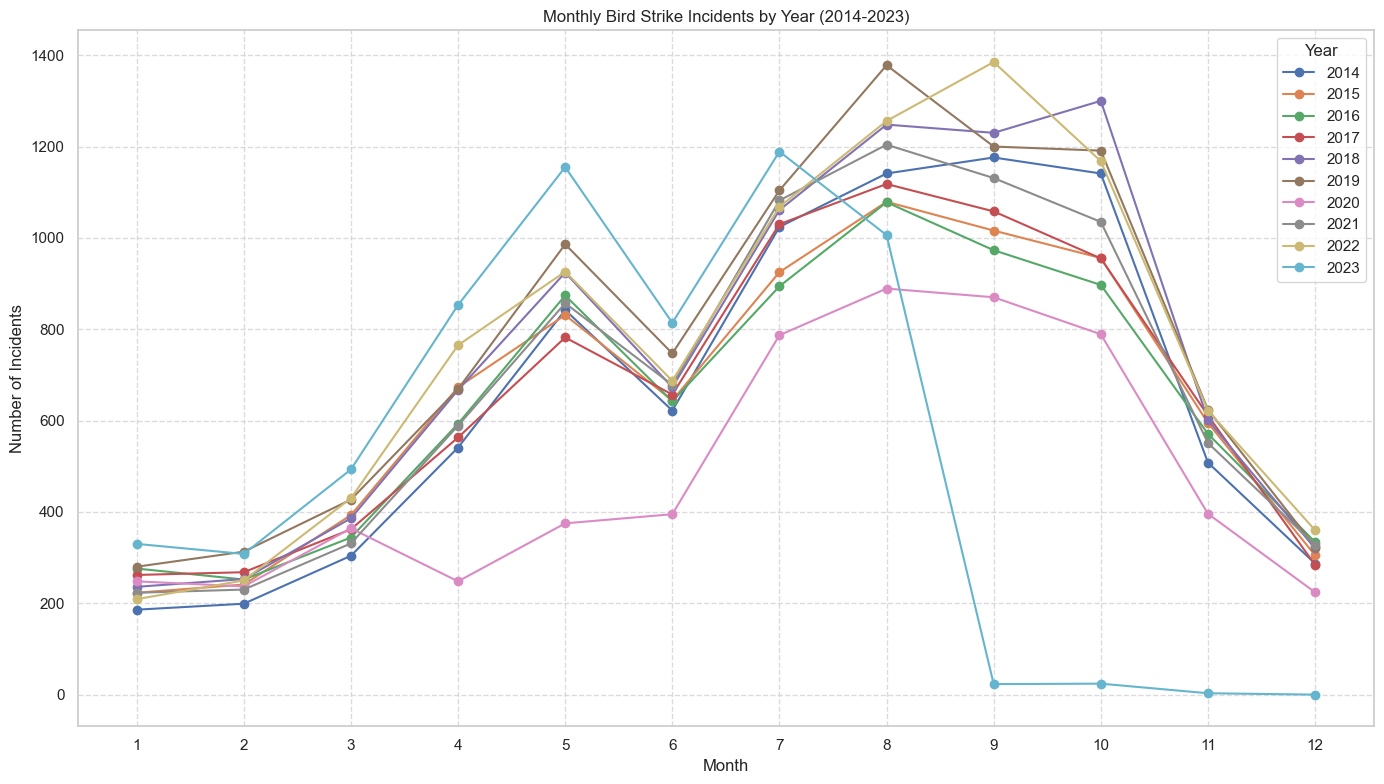

In [87]:
plt.figure(figsize=(14, 8))
for year in recent_years:
    if year in monthly_incidents.columns:
        plt.plot(monthly_incidents.index, monthly_incidents[year], marker='o', label=str(year))
plt.title('Monthly Bird Strike Incidents by Year (2014-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As we can see from the graph, there is a clear seasonal pattern that remains consistent throughout all the years.
- Peak seasons are around July to October, which is late summer and early fall. This time of year usually conicides with bird migrations. This also happens to be a time when a lot of people are traveling.
- There is a second peak at around May, which is when birds come back for spring migration. 
- During winter months, there are fewer incidents due to decreased bird activity.

These patterns show that the number of bird strikes are more related to seasonal patterns rather than air traffic/travel patterns. However, the peaks found in the graph can be a combination of both increased air traffic and bird migration patterns.

### 6. Perform ONE (1) additional analysis on the distribution. Ensure that you either : 
1) perform a comparative analysis by evaluating 3 or more groups within the data or 
2) perform a temporal analysis of the patterns over 10 or more years (this requires a year over year analysis of the patterns). Do not repeat any of the previous analysis.

In [88]:
# Analysis of aircraft parts struck by birds over the last 10 years
recent_years = range(2014, 2024)
recent_data = bird_strike_df[bird_strike_df['INCIDENT_YEAR'].isin(recent_years)]

def analyze_part_strikes(data, years):
    yearly_strikes = pd.DataFrame(index=years)
    
    yearly_totals = data.groupby('INCIDENT_YEAR').size()
    
    for part in strike_columns:
        part_name = part[4:]
        
        yearly_counts = data[data[part] == True].groupby('INCIDENT_YEAR').size()
        yearly_strikes[part_name] = yearly_counts
        
        yearly_strikes[f"{part_name}_pct"] = yearly_counts / yearly_totals * 100
    
    return yearly_strikes

yearly_part_strikes = analyze_part_strikes(recent_data, recent_years)

yearly_part_strikes = yearly_part_strikes.fillna(0)

print("\nYearly Strikes by Aircraft Part (2014-2023):")
print(yearly_part_strikes)

# Create a more focused DataFrame with just the percentages for visualization
percent_columns = [col for col in yearly_part_strikes.columns if col.endswith('_pct')]
yearly_percentages = yearly_part_strikes[percent_columns]

# Rename columns to remove the _pct suffix
yearly_percentages.columns = [col.replace('_pct', '') for col in percent_columns]

part_damage_rates = pd.DataFrame(index=strike_columns)
for part in strike_columns:
    strikes_on_part = recent_data[recent_data[part] == True]
    if len(strikes_on_part) > 0:
        damage_rate = strikes_on_part['INDICATED_DAMAGE'].mean() * 100
        part_damage_rates.loc[part, 'Damage_Rate_Pct'] = damage_rate
        part_damage_rates.loc[part, 'Strike_Count'] = len(strikes_on_part)
    else:
        part_damage_rates.loc[part, 'Damage_Rate_Pct'] = 0
        part_damage_rates.loc[part, 'Strike_Count'] = 0

part_damage_rates = part_damage_rates.sort_values('Damage_Rate_Pct', ascending=False)

print("\nDamage Rates by Aircraft Part Struck (%):")
print(part_damage_rates)



Yearly Strikes by Aircraft Part (2014-2023):
       RAD    RAD_pct  WINDSHLD  WINDSHLD_pct  NOSE   NOSE_pct  ENG1  \
2014  1164  14.602936      1598     20.047673  1371  17.199849   350   
2015  1090  13.830732      1505     19.096561  1313  16.660322   337   
2016   883  11.425983      1209     15.644410  1199  15.515010   353   
2017   950  11.949686      1333     16.767296  1289  16.213836   353   
2018  1106  12.428363      1593     17.900888  1532  17.215417   353   
2019  1066  11.533052      1556     16.834361  1552  16.791085   371   
2020   664  11.405015       970     16.660941   882  15.149433   281   
2021   861  10.450297      1364     16.555407  1330  16.142736   333   
2022  1102  12.075389      1503     16.469428  1584  17.357002   355   
2023   748  12.068409       973     15.698612   989  15.956760   285   

      ENG1_pct  ENG2  ENG2_pct  ...  FUSE   FUSE_pct   LG    LG_pct  TAIL  \
2014  4.390917   278  3.487643  ...   957  12.006022  463  5.808556   101   
2015  4

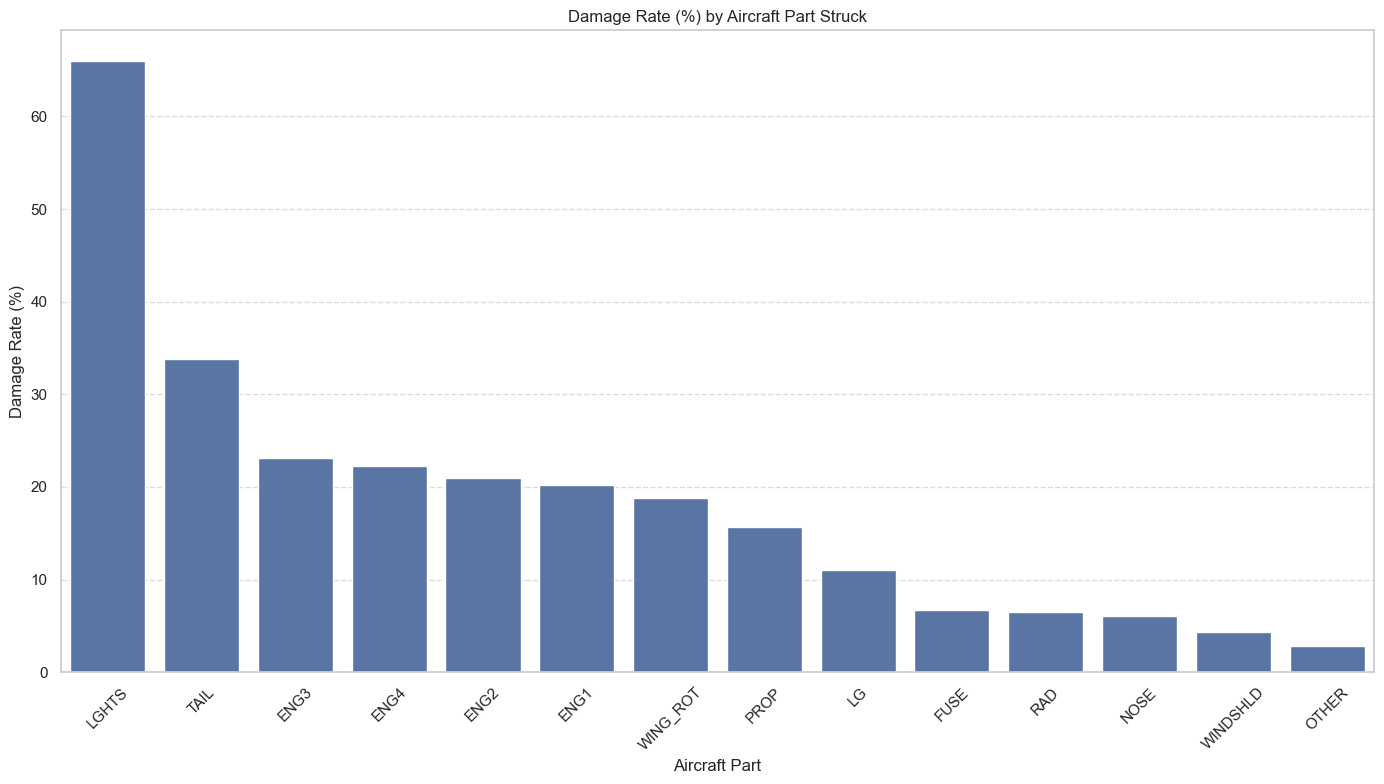

In [89]:
plt.figure(figsize=(14, 8))
part_damage_rates = part_damage_rates.reset_index()
part_damage_rates['Part'] = part_damage_rates['index'].str.replace('STR_', '')
sns.barplot(x='Part', y='Damage_Rate_Pct', data=part_damage_rates)
plt.title('Damage Rate (%) by Aircraft Part Struck')
plt.xlabel('Aircraft Part')
plt.ylabel('Damage Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We chose to analyze the aircraft parts that were struck the most by birds. 
- We can see that aircraft lights are the most vulnerable to bird strikes. Lights were shown to take the most damage, likely due to their fragile construction and exposure.
- The tail is second most vulnerable, followed by engines and propellers and wings.
- Windshield, fuselage, nose, and other parts aren't as vulnerable to bird strikes.

This analysis highlights that while certain components like lights and tails are most vulnerable to damage, critical flight systems like engines also face significant risk. These findings can help prioritize aircraft design improvements and bird strike mitigation strategies.

## Helpful resources
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below.

You do not need to cite the official python documentation.
